# **Modul 10 - GLOBAL THRESHOLDING**

## **Laporan Praktikum Mata Kuliah Pengolahan Citra dan Visi Komputer oleh:**

### Hanifah Amany

### TI-3E/16

[Link GitHub](https://github.com/hanifahamany/PCVK_Ganjil_2024/tree/main/Week_10_Hanifah)

## Tugas Praktikum

1. Import folder yang ada di Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import Library

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from PIL import Image

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di bawah.

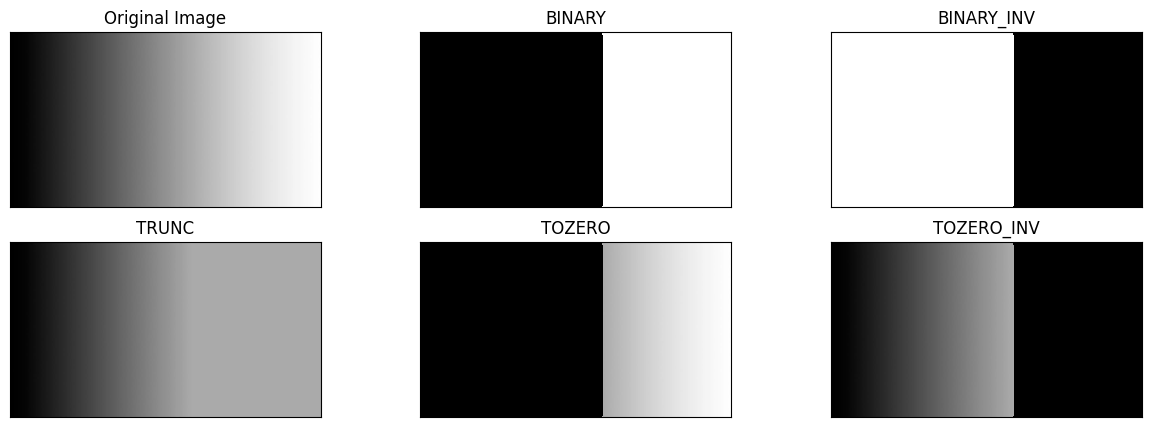

In [3]:
dir = '/content/drive/MyDrive/PCVK_2024/Week_10_Hanifah/gradient.jpg'
img = cv2.imread(dir)
thresholdBinary = cv2.imread(dir)
thresholdTrunc = cv2.imread(dir)
thresholdTozero = cv2.imread(dir)

threshold = 170

# Threshold Binary
thresholdBinary[img>threshold] = 255
thresholdBinary[img<=threshold] = 0

# Threshold Truncate
thresholdTrunc[img>threshold] = threshold

# Threshold Tozero
thresholdTozero[img<=threshold] = 0

# Threshold Binary Inverted
_, thresholdBinaryInv = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY_INV)

# Threshold Tozero Inverted
_, thresholdTozeroInv = cv2.threshold(img, threshold, 255, cv2.THRESH_TOZERO_INV)

names = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresholdBinary,thresholdBinaryInv, thresholdTrunc, thresholdTozero, thresholdTozeroInv]

plt.figure(figsize=(15, 5))
for i in range(len(images)):
    plt.subplot(2, 3, i + 1), plt.imshow(images[i], 'gray', interpolation='nearest')
    plt.title(names[i])
    plt.xticks([]), plt.yticks([])

plt.show()


4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

<ipython-input-5-527b6bdd0643>:20: RuntimeWarning: invalid value encountered in divide
  mb = sumb / wb


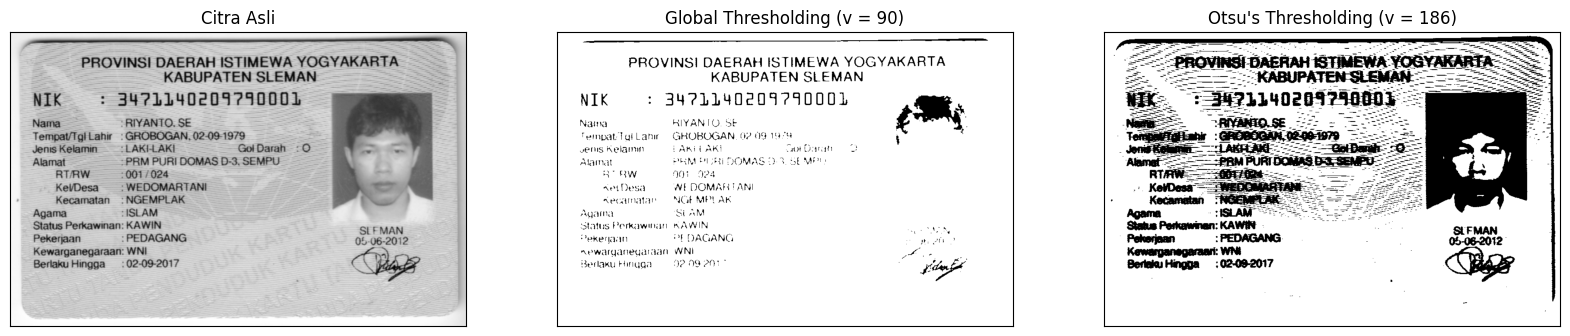

In [5]:
dir = '/content/drive/MyDrive/PCVK_2024/Week_10_Hanifah/ktp Riyanto.png'

img = cv2.imread(dir,0)
blur = cv2. GaussianBlur (img, (5,5),0)

histogram = cv2.calcHist([blur],[0],None,[256], [0,256])
histogram_norm = histogram.ravel()/histogram.max()
Q = histogram_norm.cumsum()
bins = np.arange (256)
wb = 0
sumb = 0
varmax = 0
fn_min = np.inf
threshold = -1

for i in range(0,187):
  wb += histogram[i]
  wf = (img.shape[0]*img.shape[1]) - wb
  sumb += (i*histogram[i])
  mb = sumb / wb
  mf = (sumb - sumb)/wf
  betweenvar = wb * wf * (mb - mf) * (mb - mf)
  if (betweenvar>varmax):
    varmax = betweenvar
    threshold = i

x = ("Otsu's Thresholding (v = ")+str(threshold)+")"
ret, thresholdGlobal = cv2.threshold(blur, 90, 255, cv2.THRESH_BINARY)
ret, thresholdOtsu = cv2.threshold(blur, threshold, 255, cv2. THRESH_BINARY)

names = ['Citra Asli', 'Global Thresholding (v = 90)', x]
images = [blur, thresholdGlobal, thresholdOtsu]

plt. figure(figsize = (20,15))
for i in range(len(names)):
    plt.subplot(1,3,i+1),plt.imshow(images[i], 'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
plt.show()

5.   Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images.
Petunjuk:

*   Anda dapat gunakan cv.calcHist untuk menampilkan histogram.

*   Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html
*Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter
yaitu mask. Jika diset None, maka keseluruhan image akan dihitung
histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
dimasking warna putih yang akan dihitung histogramnya (dari contoh
dibawah dinamakan dengan Citra Segment).
  

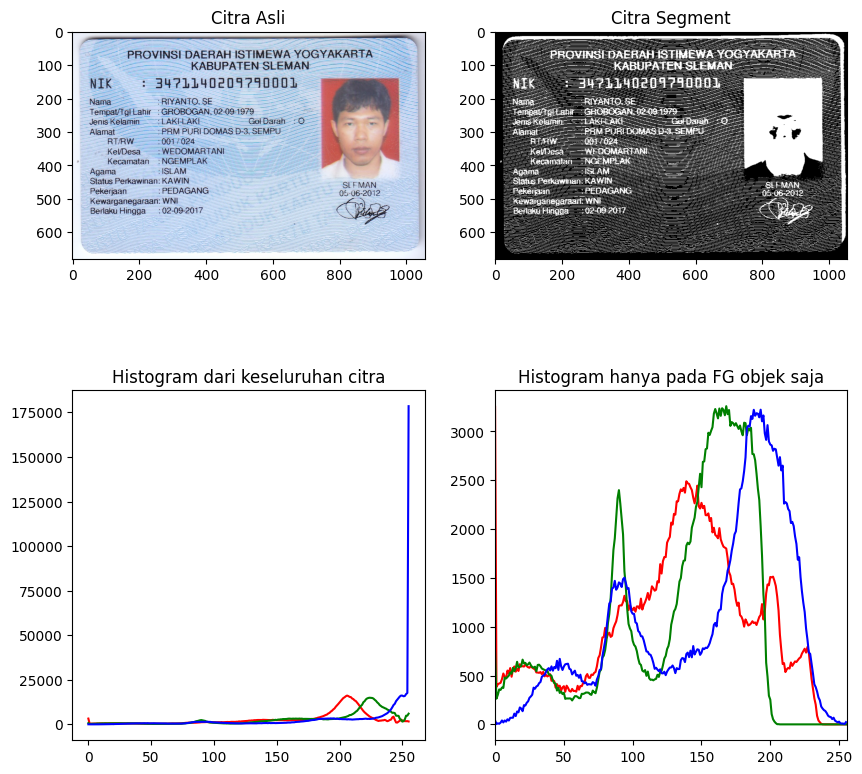

In [6]:
dir = '/content/drive/MyDrive/PCVK_2024/Week_10_Hanifah/ktp Riyanto.png'

img = cv2.imread(dir)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')
for i,col in enumerate(color):
    histogramSeluruhCitra = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(histogramSeluruhCitra,color = col)
    plt.title('Histogram dari keseluruhan citra')
    histogramForeground = cv2.calcHist([img],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(histogramForeground,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])
plt.show()

6.   Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna
yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

(<Axes: >, <matplotlib.image.AxesImage at 0x7ec4dd512290>)

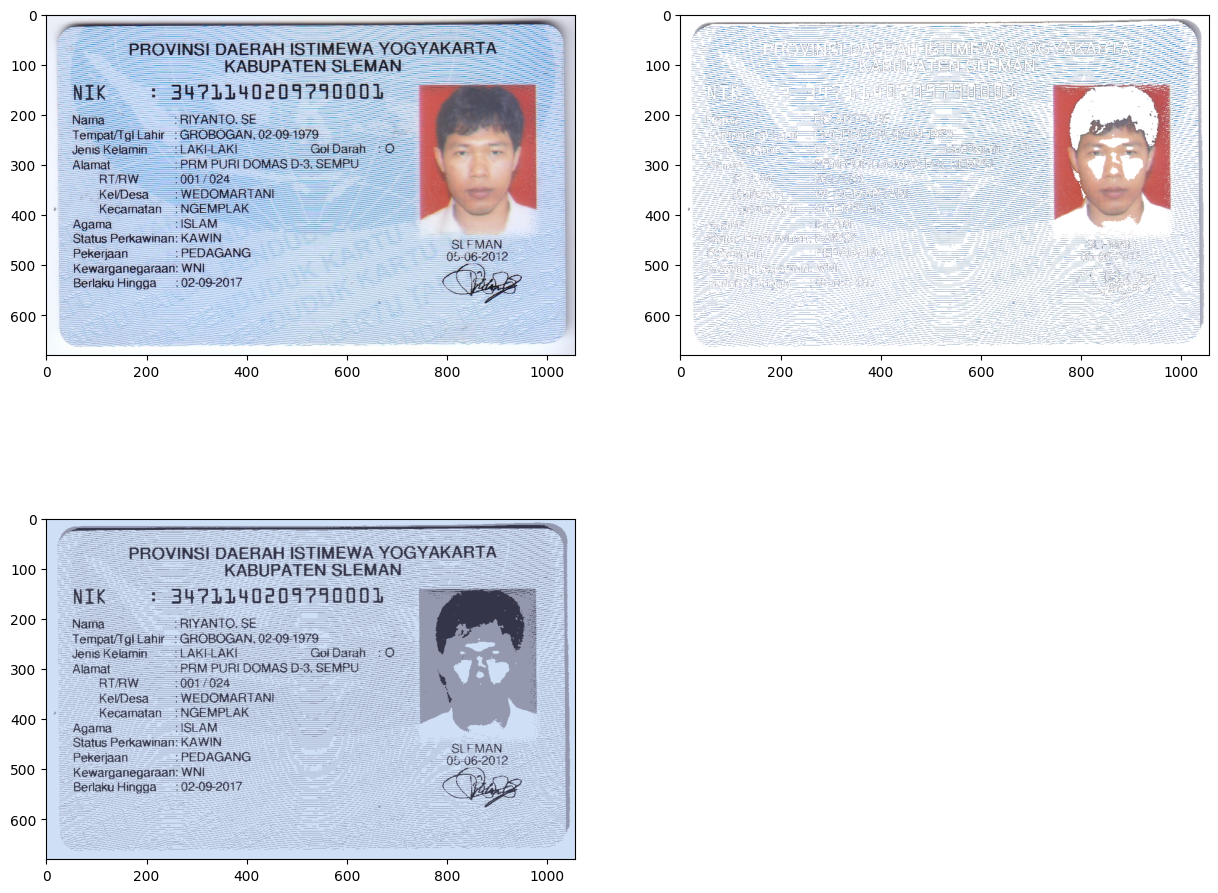

In [11]:
filename = '/content/drive/MyDrive/PCVK_2024/Week_10_Hanifah/ktp Riyanto.png'
# Use cv2 instead of cv to call functions from the OpenCV library
img = cv2.imread(filename)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
'''
kita akan menggunakan fungsi cv.kmeans() yang meminta
array 2D sebagai masukan, sedangkan image aslinya adalah
array 3D
selanjutnya kita perlu melakukan flattening array image
masukan
'''
#reshape array ke bentuk 2D
pixel_values = img.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)
# Use cv2 instead of cv to access constants from the OpenCV library
criteria = (cv2.TERM_CRITERIA_EPS +
cv2.TERM_CRITERIA_MAX_ITER, 150, 0.1)
'''
jika diperhatikan pada image asli, terdapat 3 warna utama
(hijau, biru, dan putih/orange). untuk percobaan ini kita
akan gunakan
3 cluster untuk image ini
'''
k = 3
# Use cv2 instead of cv to call functions from the OpenCV library
_, labels, (centers) = cv2.kmeans(pixel_values, k, None,
criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
#konversi titik centroid kedalam integer
centers = np.uint8(centers)
#flattening label array
labels = labels.flatten()
#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]
# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img.shape)
masked_image = np.copy(img)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img.shape)

plt.figure(figsize = (15,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(masked_image0)
plt.subplot(2,2,3),plt.imshow(segmented_image)

##   Berikut adalah proses konversi gambar KTP menjadi teks yang dapat mengenali tulisan.

1.  Install PIP OCR

In [12]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 49 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 1s (5,929 kB/s)
debconf: unable to ini

2. Menambahkan axis kedalam objek figure dengan method add_subplot(). kemudian kita
tunjukan objek figure kita dengan method show()

In [14]:
def display(img,cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

3.   Python-tesseract akan mencetak teks yang dikenali dan menyimpannya kedalam file

In [17]:
from pytesseract import Output
import cv2
import pytesseract
img = cv2.imread('/content/drive/MyDrive/PCVK_2024/Week_10_Hanifah/ktp Riyanto.png')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


4.   Menambahkan kotak untuk deteksi teksi pada gambar

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


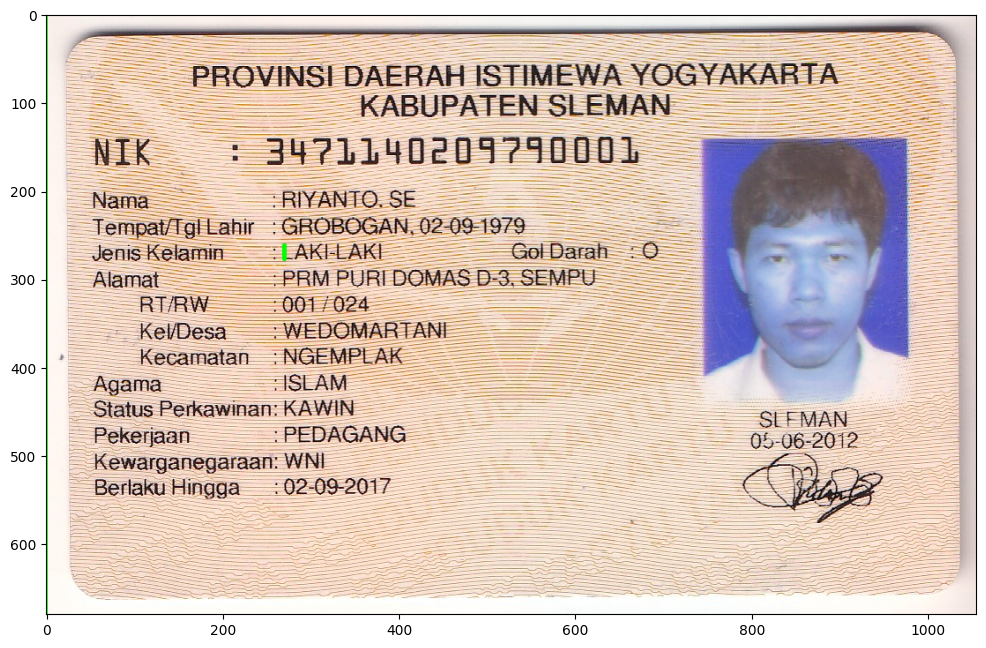

In [20]:
from pytesseract import Output
import cv2
import pytesseract
img = cv2.imread('/content/drive/MyDrive/PCVK_2024/Week_10_Hanifah/ktp Riyanto.png')

text1 = pytesseract.image_to_data(img, output_type=Output.DICT)
print(text1.keys())

n_boxes = len(text1['text'])
for i in range(n_boxes):
  if int(text1['conf'][i]) > 60:
    (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
    img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
display(img)

5.  Hasil pembacaan KTP Menjadi text

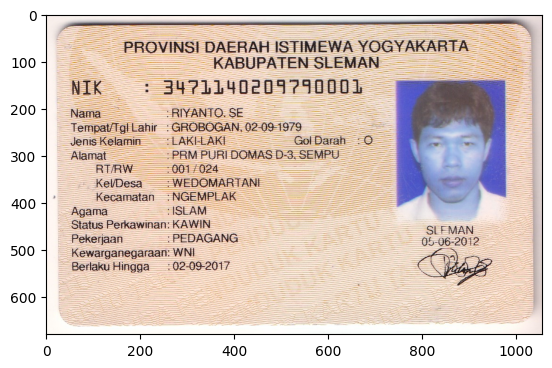

In [21]:
img = cv2.imread("/content/drive/MyDrive/PCVK_2024/Week_10_Hanifah/ktp Riyanto.png")
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)